In [1]:
from strkernel.mismatch_kernel import MismatchKernel
from strkernel.mismatch_kernel import preprocess
from Bio import SeqIO
from Bio.Seq import Seq
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from numpy import random

In [2]:
seq = [seq.seq for seq in SeqIO.parse('../../data/pseudo/concatenated.fasta', 'fasta')]

In [3]:
seq_processed = preprocess(seq, ignoreLower=False)

In [4]:
# 4h 24min 25s
%time kernel = MismatchKernel(l=5, k=5, m=1).get_kernel(seq_processed).kernel

CPU times: user 4h 24min 25s, sys: 14min 36s, total: 4h 39min 1s
Wall time: 3h 39min 40s


In [23]:
np.save('../../data/pseudo/preprocess/others/n_kernel.npy', kernel)

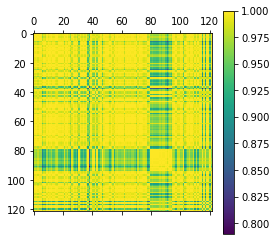

In [13]:
plt.matshow(kernel)
plt.colorbar()
plt.show()

In [25]:
mismatch_collection = ['AATGCG',
                       'ACGTTT',
                       'AGATGC',
                       'TCACCG',
                       'CGTCTC']
# sequences = ['aatgcACGTTGAgatcg','acgtgACGTTTGacggt', 'agtccATGCTGTaagtc', 'gttccTCACCGTcgcgt', 'gtacgTCTCGCTgtcgt']
# preprocess
after_process = preprocess(mismatch_collection, ignoreLower=False)
# compute mismatch kernel
mismatch_kernel = MismatchKernel(l=4, k=5, m=1).get_kernel(after_process, normalize=False)

In [21]:
after_process

[[0, 0, 3, 2, 1, 2],
 [0, 1, 2, 3, 3, 3],
 [0, 2, 0, 3, 2, 1],
 [3, 1, 0, 1, 1, 2],
 [0, 1, 2, 0, 2, 0]]

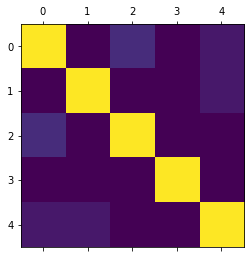

In [22]:
plt.matshow(mismatch_kernel.kernel)

In [ ]:
data = np.load('../../data/pseudo/preprocess/o_c_-.npy')

In [53]:
data.max()

124

In [79]:
temp = np.floor(np.abs(np.random.randn(10, 10)*10))
temp

array([[ 3.,  2.,  7.,  2., 18., 17.,  0.,  5., 17.,  3.],
       [ 6.,  9., 10.,  8.,  1., 13., 13.,  5.,  1., 12.],
       [13.,  6., 11.,  1.,  6., 24.,  0., 10.,  5.,  7.],
       [19., 12., 12.,  7.,  1., 11.,  6.,  3.,  3., 12.],
       [ 4.,  5.,  5.,  5.,  5., 14.,  6., 18.,  0., 12.],
       [ 6., 21., 10.,  2.,  8., 15.,  7.,  4., 15.,  1.],
       [ 4.,  3.,  7., 14.,  0.,  9.,  0.,  6.,  2.,  9.],
       [ 3.,  1.,  7., 11.,  4.,  7., 10.,  1.,  7.,  8.],
       [ 0.,  5., 14.,  5.,  9.,  6.,  4.,  4., 28., 15.],
       [ 2., 14., 14.,  0.,  0., 16., 10.,  4.,  6.,  7.]])

In [92]:
temp = data[:, :100]
mismatch_kernel = MismatchKernel(l=int(temp.max()), k=2, m=1).get_kernel(temp)

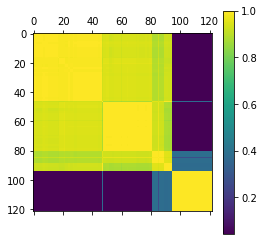

In [93]:
plt.matshow(mismatch_kernel.kernel)
plt.colorbar()
plt.show()

In [91]:
mismatch_kernel.kernel

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])